In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski  
from skimage.draw import polygon
import numpy as np

In [2]:
def Detect(img, minDist, param1, param2, minRadius, maxRadius):
    detected_circles = cv.HoughCircles(img, 
                       cv.HOUGH_GRADIENT,
                       1, 
                       minDist, 
                       param1=param1, 
                       param2=param2, 
                       minRadius=minRadius, 
                       maxRadius=maxRadius)
    return detected_circles

In [3]:
def count_circles(img, detected_circles):
    image = img.copy()
    pipes_count = 0
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

        for points in detected_circles[0, :]:
            a, b, r = points[0], points[1], points[2]

            cv.circle(image, (a, b), r, (0, 255, 0), 2)

            # Draw a small circle (of radius 1) to show the center.
            cv.circle(image, (a, b), 1, (255, 0, 0), 3)

            pipes_count += 1

    plt.figure(figsize=(6,6))
    plt.imshow(image)
    return pipes_count

## Logs-1.jpg

Total woods:  115


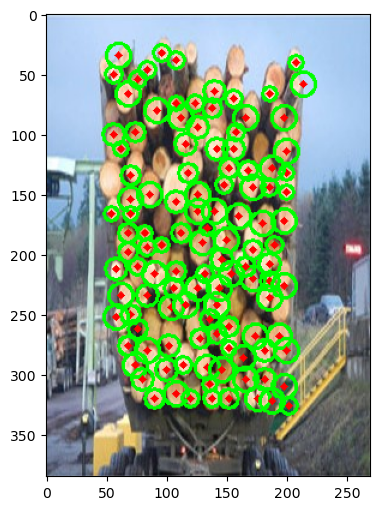

In [4]:
image_1 = cv.imread("D:/xuexi/CV/lab2/p-2023-09-27/task2/logs-1.jpg")
image_1 = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)

wellplate = np.copy(image_1)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
rr, cc = ski.draw.rectangle(start=(25, 50), extent=(310, 160))
mask[rr, cc] = 1
masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
masked_img_gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)
masked_img_gray = cv.blur(masked_img_gray, (3, 3))

woods_count = count_circles(image_1, Detect(masked_img_gray, 12, 400, 6, 5, 11))
print("Total woods: ", woods_count)

## Logs-2.jpg

Total woods:  124


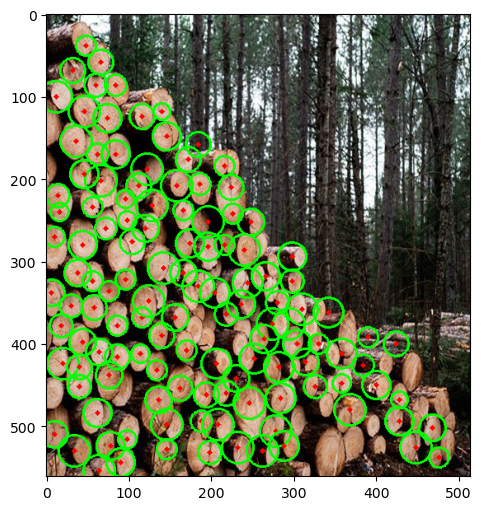

In [5]:
image_2 = cv.imread("D:/xuexi/CV/lab2/p-2023-09-27/task2/logs-2.jpg")
image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)

r = np.array([0, 0, 560, 560, 460])
c = np.array([50, 0, 0, 510, 510])
rr, cc = polygon(r, c)

wellplate = np.copy(image_2)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
mask[rr, cc] = 1
masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
masked_img_gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)
masked_img_gray = cv.blur(masked_img_gray, (3, 3))

woods_count = count_circles(image_2, Detect(masked_img_gray, 20, 400, 11, 10, 20))
print("Total woods: ", woods_count)

## pipes-4.jpg

Total pipes:  78


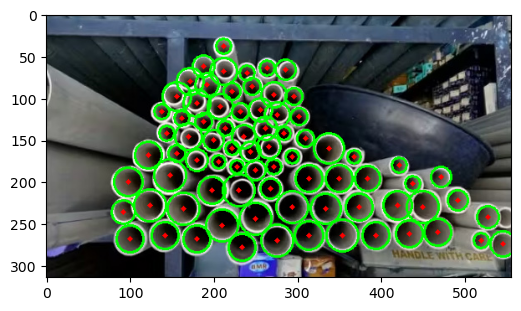

In [6]:
image_3 = cv.imread("D:/xuexi/CV/lab2/p-2023-09-27/task2/pipes-4.jpg")
image_3 = cv.cvtColor(image_3, cv.COLOR_BGR2RGB)
image_3_gray = cv.cvtColor(image_3, cv.COLOR_BGR2GRAY)
image_3_gray = cv.blur(image_3_gray, (3, 3)) 
pipes_count = count_circles(image_3, Detect(image_3_gray, 15, 400, 20, 5, 20))
print("Total pipes: ", pipes_count)

## pipes-5.jpg

Total pipes:  161


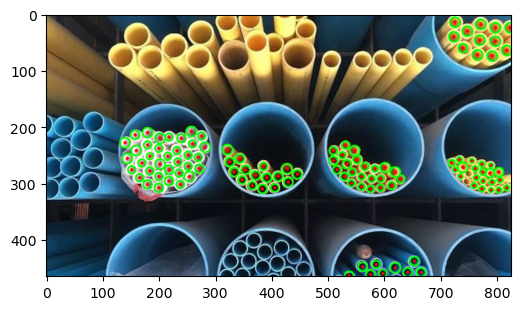

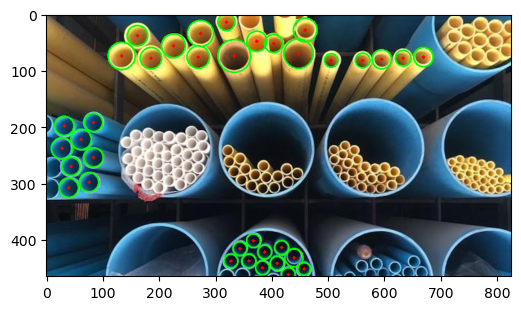

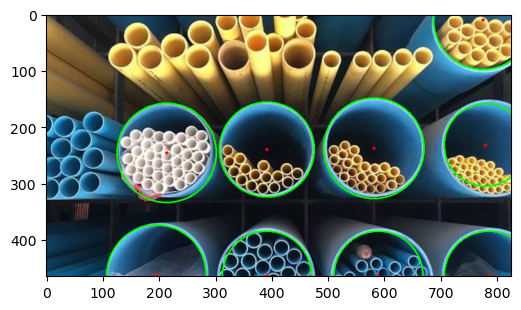

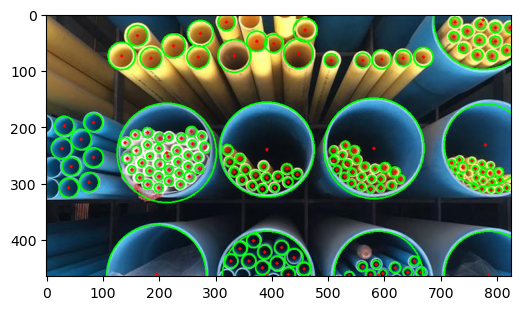

In [7]:
image_4 = cv.imread("D:/xuexi/CV/lab2/p-2023-09-27/task2/pipes-5.jpg")
image_4 = cv.cvtColor(image_4, cv.COLOR_BGR2RGB)
image_4_gray = cv.cvtColor(image_4, cv.COLOR_BGR2GRAY)
image_4_gray = cv.blur(image_4_gray, (3, 3)) 
detected_circles_s = Detect(image_4_gray, 10, 200, 15, 0, 10)
detected_circles_m = Detect(image_4_gray, 10, 500, 28, 11, 30)
detected_circles_l = Detect(image_4_gray, 100, 580, 20, 50, 100)
cont1 = count_circles(image_4, detected_circles_s)
cont2 = count_circles(image_4, detected_circles_m)
cont3 = count_circles(image_4, detected_circles_l)
merged_circles = np.concatenate((detected_circles_s, detected_circles_m, detected_circles_l), axis=1)
pipes_count = count_circles(image_4, merged_circles)
print("Total pipes: ", pipes_count)

## pipes-6.jpg

Total pipes:  107


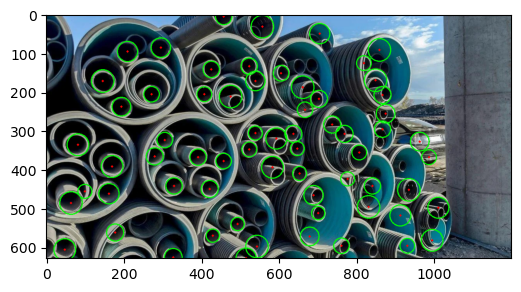

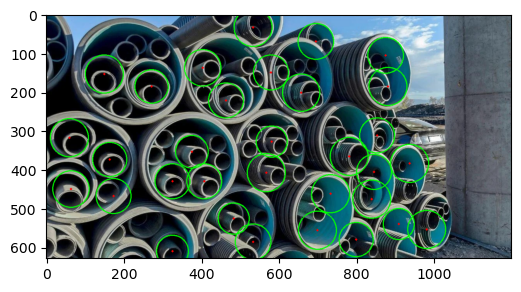

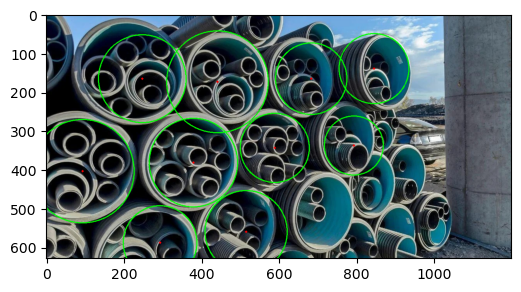

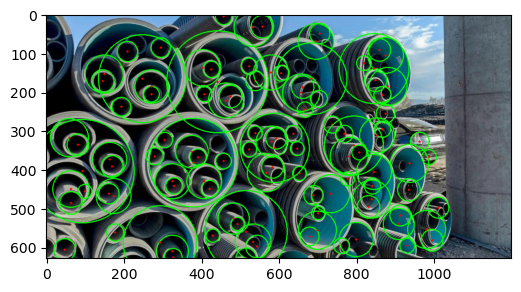

In [8]:
image_5 = cv.imread("D:/xuexi/CV/lab2/p-2023-09-27/task2/pipes-6.jpg")
image_5 = cv.cvtColor(image_5, cv.COLOR_BGR2RGB)
image_5_gray = cv.cvtColor(image_5, cv.COLOR_BGR2GRAY)
image_5_gray = cv.blur(image_5_gray, (3, 3)) 

detected_circles_s = Detect(image_5_gray, 40, 500, 15, 15, 30)
detected_circles_m = Detect(image_5_gray, 60, 500, 15, 40, 50)
detected_circles_l = Detect(image_5_gray, 100, 600, 20, 70, 140)
cont1 = count_circles(image_5, detected_circles_s)
cont2 = count_circles(image_5, detected_circles_m)
cont3 = count_circles(image_5, detected_circles_l)
merged_circles = np.concatenate((detected_circles_s, detected_circles_m, detected_circles_l), axis=1)
pipes_count = count_circles(image_5, merged_circles)
print("Total pipes: ", pipes_count)